# KC HOUSE PREDICTION

**This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The price is dependent on various features like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price.**

## PROJECT EXPECTATIONS
1. A proper approach to the subject matter
2. Data cleaning
3. model building
4. model deployment
5. visualization using Tableau
6. Ensure every file is save in a folder. save the folder with your name

## DATA DICTIONARY

**Column Name	Description	Data Type**
1. id:	Unique identifier for each property.	Integer/String
2. date:	Date of the property sale in the format YYYYMMDDT000000.	String
3. price:	Sale price of the property.	Float
4. bedrooms:	Number of bedrooms in the property.	Integer
5. bathrooms:	Number of bathrooms (may include fractional values, e.g., 2.5 for 2 full bathrooms and 1 half).	Float
6. sqft_living:	Total square footage of the interior living space.	Integer
7. sqft_lot:	Total square footage of the lot the property is on.	Integer
8. floors:	Number of floors in the property.	Float
9. waterfront:	Whether the property has a waterfront view (0 = No, 1 = Yes).	Integer
10. view:	Quality of the property view (scale: 0 to 4, higher means better view).	Integer
11. condition:	Condition of the house (scale: 1 to 5, higher means better condition).	Integer
12. grade:	Construction and design grade (scale: 1 to 13, higher means better quality).	Integer
13. sqft_above:	Square footage of the house excluding the basement.	Integer
14. sqft_basement:	Square footage of the basement.	Integer
15. yr_built:	Year the house was built.	Integer
16. yr_renovated:	Year the house was last renovated (0 if never renovated).	Integer
17. zipcode:	ZIP code of the property location.	String
18. lat:	Latitude coordinate of the property location.	Float
19. long:	Longitude coordinate of the property location.	Float
20. sqft_living15:	Living room area of the nearest 15 neighbors (mean square footage).	Integer
21. sqft_lot15:	Lot size of the nearest 15 neighbors (mean square footage).	Integer


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load file

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
#check for null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
#checking the information of the columns in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.shape

(21613, 21)

## Data Cleaning

In [7]:
#Convert 'sale_date' to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

In [8]:
data['date'].value_counts()

date
2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: count, Length: 372, dtype: int64

In [9]:
#make a duplicate copy of the dataset
df = data.copy()

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
#dropping irrelevants columns
df.drop(['sqft_above', 'sqft_basement','date', 'id', 'zipcode'], axis = 1, inplace=True)

In [12]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0,47.5345,-122.069,1410,1287


In [13]:
df.duplicated().sum() #checking for duplicates values

5

In [14]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
#DATA DESCRIPTION
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,47.6168,-122.045,1800,7503


## Declare the dependent and the independent variables

In [18]:
x = df.drop('price', axis=1)
y = df['price']

In [19]:
df['price'].value_counts().head(10)

price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: count, dtype: int64

In [20]:
df['price'].min()

75000.0

In [21]:
df['price'].max()

7700000.0

In [22]:
#checking the value count of price
df['price'].value_counts().head(10)

price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: count, dtype: int64

In [23]:
# value count for bedroom
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

<Axes: >

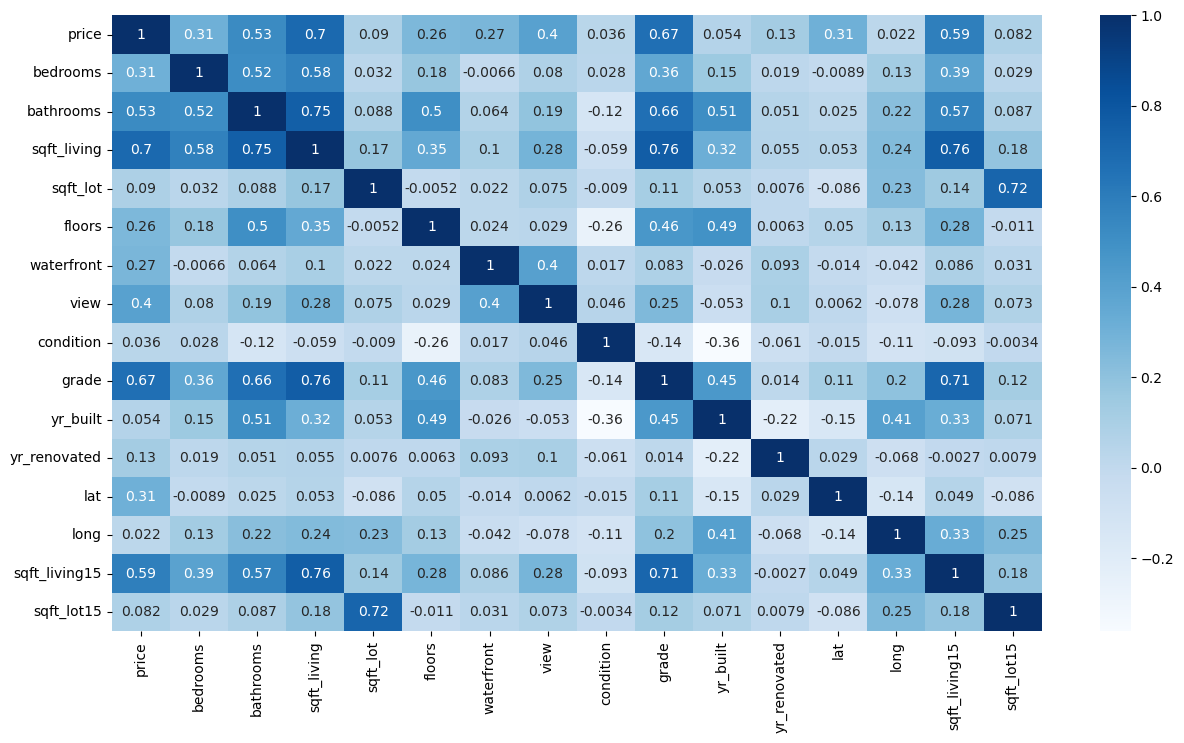

In [24]:
#plotting correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

### Exploration

<Axes: xlabel='lat', ylabel='long'>

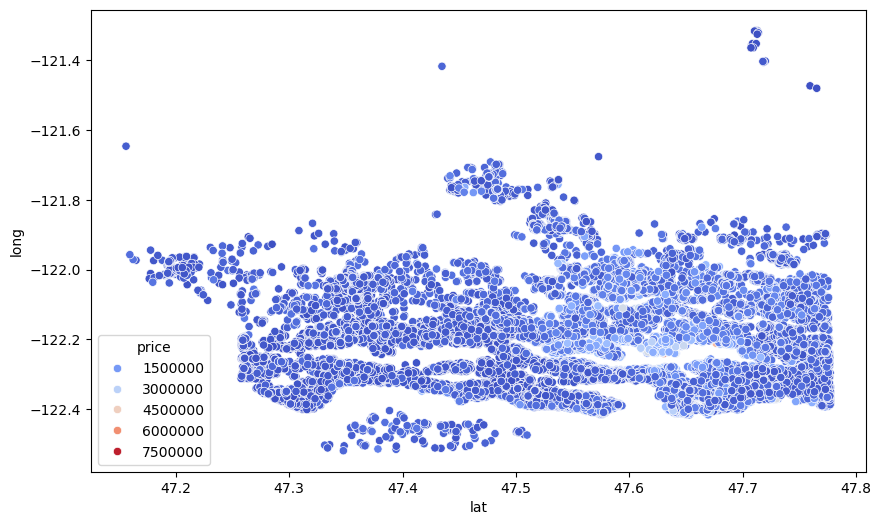

In [25]:
# the blue indicates less expensive while the red indicates more expensive house
#checking the locations with the highest price of sale
plt.figure(figsize=(10,6))
sns.scatterplot(x='lat', y='long', data= df, hue='price', palette='coolwarm')

<Axes: xlabel='lat', ylabel='long'>

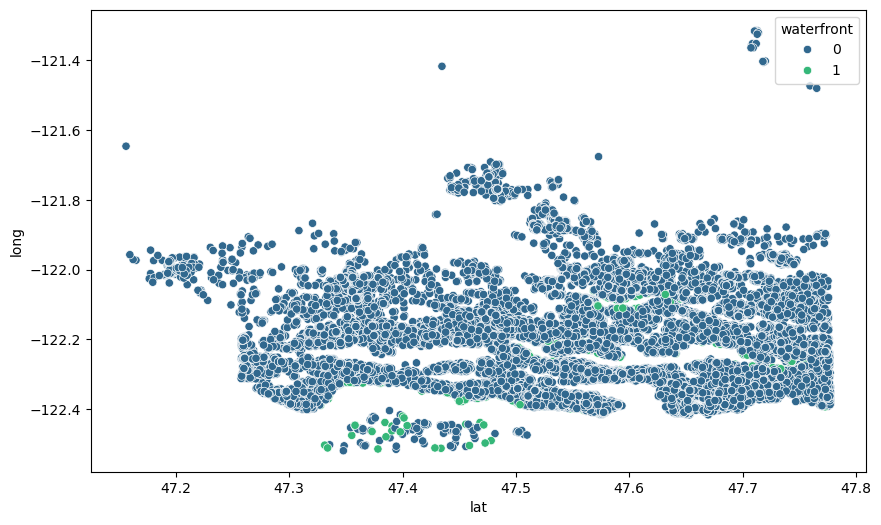

In [26]:
#checking the houses situated at the waterfront
plt.figure(figsize=(10,6))
sns.scatterplot(x='lat', y='long', data= df, hue='waterfront', palette='viridis')

### Outlier Detection on the target variable(Price)

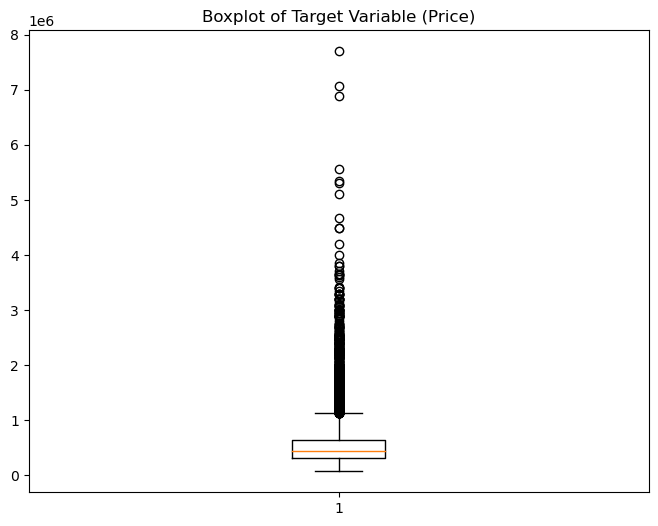

In [27]:
#Check for Outliers in the Target Variable (price): Use visualization techniques like box plots or histograms:
plt.figure(figsize=(8,6))
plt.boxplot(y)
plt.title("Boxplot of Target Variable (Price)")
plt.show()

## Removing Outliers

**The presence of so many outliers suggests that high-value properties (luxury homes) are significantly driving up the upper end of the price distribution.**

**These outliers can distort the performance of regression models like Linear Regression, which are sensitive to extreme values.**

**Most properties fall within a lower price range, as indicated by the compact box and lower whisker range.**

In [28]:
#Log Transformation: Apply a log transformation to reduce the effect of large outliers in the dependent variable.

y_log = np.log1p(y)

In [29]:
y.value_counts().head(10)

price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: count, dtype: int64

In [30]:
#scalling the data
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)


## Split the Data into training and testing
Split the dataset into training and testing sets.

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# RandomForest Regression

### Hyperparameter Tuning: 
**Use GridSearchCV or RandomizedSearchCV to optimize Random Forest parameters such as n_estimators and max_features:**

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define your random forest model
forest = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [3, 10, 30],        # Number of trees in the forest
    'max_features': [2, 4, 6, 8]       # Number of features to consider at every split
}

# Define GridSearchCV
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=5,                             # 5-fold cross-validation
    scoring='neg_mean_squared_error', # Use negative MSE as the scoring metric
    return_train_score=True
)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)


Best Parameters: {'max_features': 8, 'n_estimators': 30}
Best Negative MSE Score: -16064443783.92031


In [33]:
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
forest.score(x_test, y_test)

0.8552875715790813

## Model Prediction

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
#Use the trained model to predict on the test data:
y_pred = forest.predict(x_test)

## Evaluate the Model

In [37]:
# Calculate Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 21877149151.38
R² Score: 0.8553


## MODEL DEPLOYMENT

In [42]:
import joblib

# Save the trained model
joblib.dump(forest, 'KC_House_price_Prediction.pkl')
print("Model saved as KC_House_price_Prediction.pkl")


Model saved as KC_House_price_Prediction.pkl
